## Offline model evaluation
We evaluate the model here without using the simulator but directly with our dataset

In [1]:
from gr00t.utils.eval import calc_mse_for_single_trajectory
import warnings
from gr00t.experiment.data_config import DATA_CONFIG_MAP
from gr00t.model.policy import Gr00tPolicy
from gr00t.data.schema import EmbodimentTag
from gr00t.data.dataset import LeRobotSingleDataset
import numpy as np
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

warnings.simplefilter("ignore", category=FutureWarning)

PRE_TRAINED_MODEL_PATH = "DavidKalajdzic/dr00ne-gr00t-lora-rank0"
EMBODIMENT_TAG = EmbodimentTag.NEW_EMBODIMENT
DATASET_PATH = "/mloscratch/users/kalajdzi/track-hawk/data_track_hawk/dataset_drone_control"


data_config = DATA_CONFIG_MAP["track_hawk"]
modality_config = data_config.modality_config()
modality_transform = data_config.transform()


pre_trained_policy = Gr00tPolicy(
    model_path=PRE_TRAINED_MODEL_PATH,
    embodiment_tag=EMBODIMENT_TAG,
    modality_config=modality_config,
    modality_transform=modality_transform,
    device=device,
)

dataset = LeRobotSingleDataset(
    dataset_path=DATASET_PATH,
    modality_configs=modality_config,
    video_backend="decord",
    video_backend_kwargs=None,
    transforms=None,
    embodiment_tag=EMBODIMENT_TAG,
)

/mloscratch/users/kalajdzi/anaconda3/envs/gr00t/lib/python3.10/site-packages/_distutils_hack/__init__.py:53: UserWarning: Reliance on distutils from stdlib is deprecated. Users must rely on setuptools to provide the distutils module. Avoid importing distutils or import setuptools first, and avoid setting SETUPTOOLS_USE_DISTUTILS=stdlib. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(
/mloscratch/users/kalajdzi/anaconda3/envs/gr00t/lib/python3.10/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
/mloscratch/users/kalajdzi/anaconda3/envs/gr00t/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/mloscratch/users/kalajd

Loading pretrained dual brain from /home/runai-home/.cache/huggingface/hub/models--DavidKalajdzic--dr00ne-gr00t-lora-rank0/snapshots/de958b89de7decef9f619433fe80ef2069c0bf57
Tune backbone vision tower: True
Tune backbone LLM: False
Tune action head projector: True
Tune action head DiT: True
Model not found or avail in the huggingface hub. Loading from local path: /home/runai-home/.cache/huggingface/hub/models--DavidKalajdzic--dr00ne-gr00t-lora-rank0/snapshots/de958b89de7decef9f619433fe80ef2069c0bf57
Total number of DiT parameters:  537803776


Some weights of the model checkpoint at /mloscratch/users/kalajdzi/.cache/huggingface/hub/models--nvidia--GR00T-N1-2B/snapshots/32e1fd2507f7739fad443e6b449c8188e0e02fcb were not used when initializing GR00T_N1: ['action_head.decode_layer.bias', 'action_head.decode_layer.weight']
- This IS expected if you are initializing GR00T_N1 from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing GR00T_N1 from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Tune action head projector: True
Tune action head diffusion model: True
Tune action head projector: True
Tune action head diffusion model: True
Initialized dataset dataset_drone_control with EmbodimentTag.NEW_EMBODIMENT


In [2]:
def evaluate_traj(dataset, traj_id, plot=True):
    print("Running trajectory:", traj_id)

    # we did a lot of small changes in the original Gr00t codebase, for instance here we changed the evaluation to plot the state and actions that it predicted.
    # and the 9=dim(states) != dim(actions)=3 in our case.
    # interesting plots to read are the "Action dim 1", "Action dim 2", "Action dim 3" because we actually can see how the values of each action'0s dimension is between predicted and groundtruth.

    # Little explanation of how it is evaluated : we use the model at many inferencinf steps (red dots) and compare the prediciton of 16 future actions from that inference steps  with the groundtruth from dataset.
    # The goal is to show that the model was able to fit well to the data which would mean the model is doing what we want, meaning following an object described with natural language.
    
    mse = calc_mse_for_single_trajectory(
        pre_trained_policy,
        dataset,
        traj_id=traj_id,
        state_modality_keys=["drone_state"],
        action_modality_keys=["drone_action"],
        steps=906,
        action_horizon=16,
        plot=plot
    )

    print("MSE loss for trajectory ", traj_id, ":" , mse)
    print("==============================")
    return mse

Running trajectory: 0
inferencing at step:  0


Starting from v4.46, the `logits` model output will have the same type as the model (except at train time, where it will always be FP32)


inferencing at step:  16
inferencing at step:  32
inferencing at step:  48
inferencing at step:  64
inferencing at step:  80
inferencing at step:  96
inferencing at step:  112
inferencing at step:  128
inferencing at step:  144
inferencing at step:  160
inferencing at step:  176
inferencing at step:  192
inferencing at step:  208
inferencing at step:  224
inferencing at step:  240
inferencing at step:  256
inferencing at step:  272
inferencing at step:  288
inferencing at step:  304
inferencing at step:  320
inferencing at step:  336
inferencing at step:  352
inferencing at step:  368
inferencing at step:  384
inferencing at step:  400
inferencing at step:  416
inferencing at step:  432
inferencing at step:  448
inferencing at step:  464
inferencing at step:  480
inferencing at step:  496
inferencing at step:  512
inferencing at step:  528
inferencing at step:  544
inferencing at step:  560
inferencing at step:  576
inferencing at step:  592
inferencing at step:  608
inferencing at ste

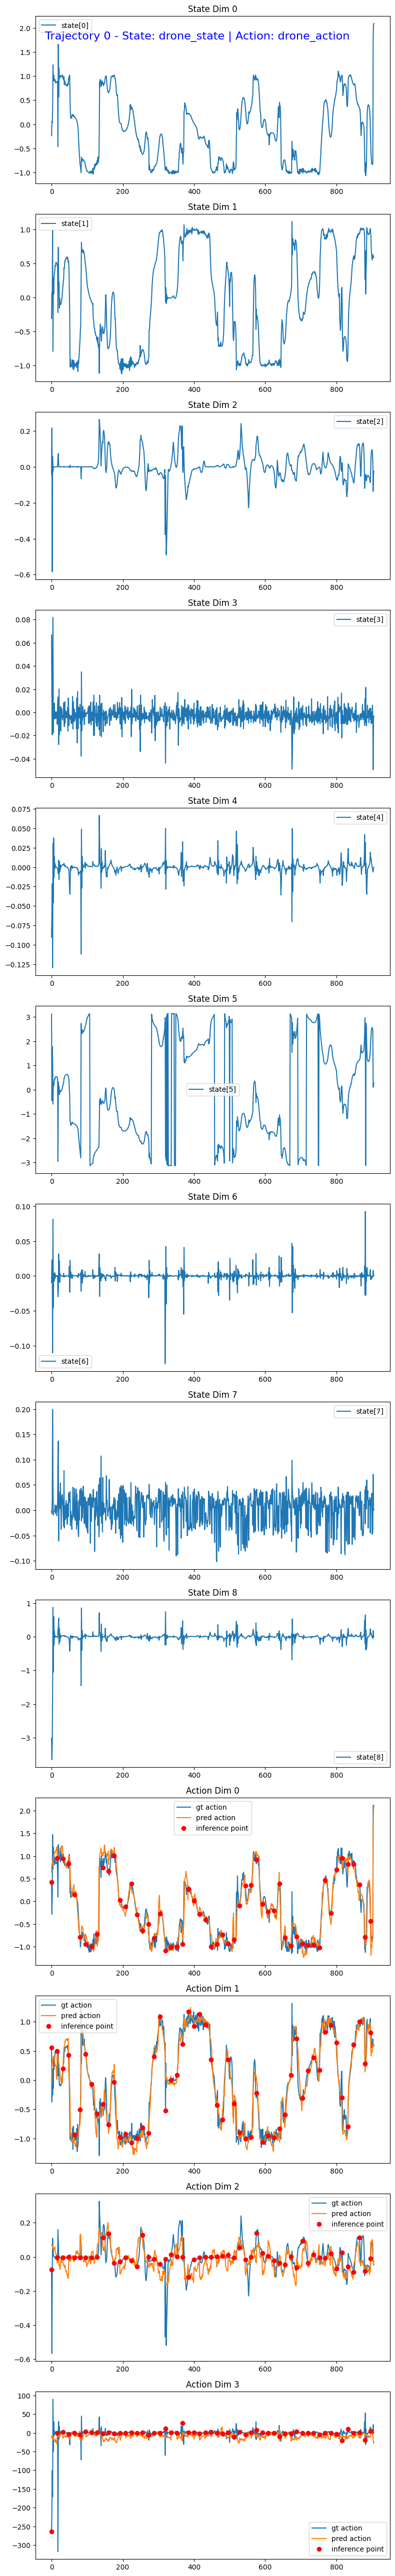

MSE loss for trajectory  0 : 103.6028906736802


In [3]:
mse0 = evaluate_traj(dataset, 0)

Running trajectory: 1
inferencing at step:  0
inferencing at step:  16
inferencing at step:  32
inferencing at step:  48
inferencing at step:  64
inferencing at step:  80
inferencing at step:  96
inferencing at step:  112
inferencing at step:  128
inferencing at step:  144
inferencing at step:  160
inferencing at step:  176
inferencing at step:  192
inferencing at step:  208
inferencing at step:  224
inferencing at step:  240
inferencing at step:  256
inferencing at step:  272
inferencing at step:  288
inferencing at step:  304
inferencing at step:  320
inferencing at step:  336
inferencing at step:  352
inferencing at step:  368
inferencing at step:  384
inferencing at step:  400
inferencing at step:  416
inferencing at step:  432
inferencing at step:  448
inferencing at step:  464
inferencing at step:  480
inferencing at step:  496
inferencing at step:  512
inferencing at step:  528
inferencing at step:  544
inferencing at step:  560
inferencing at step:  576
inferencing at step:  59

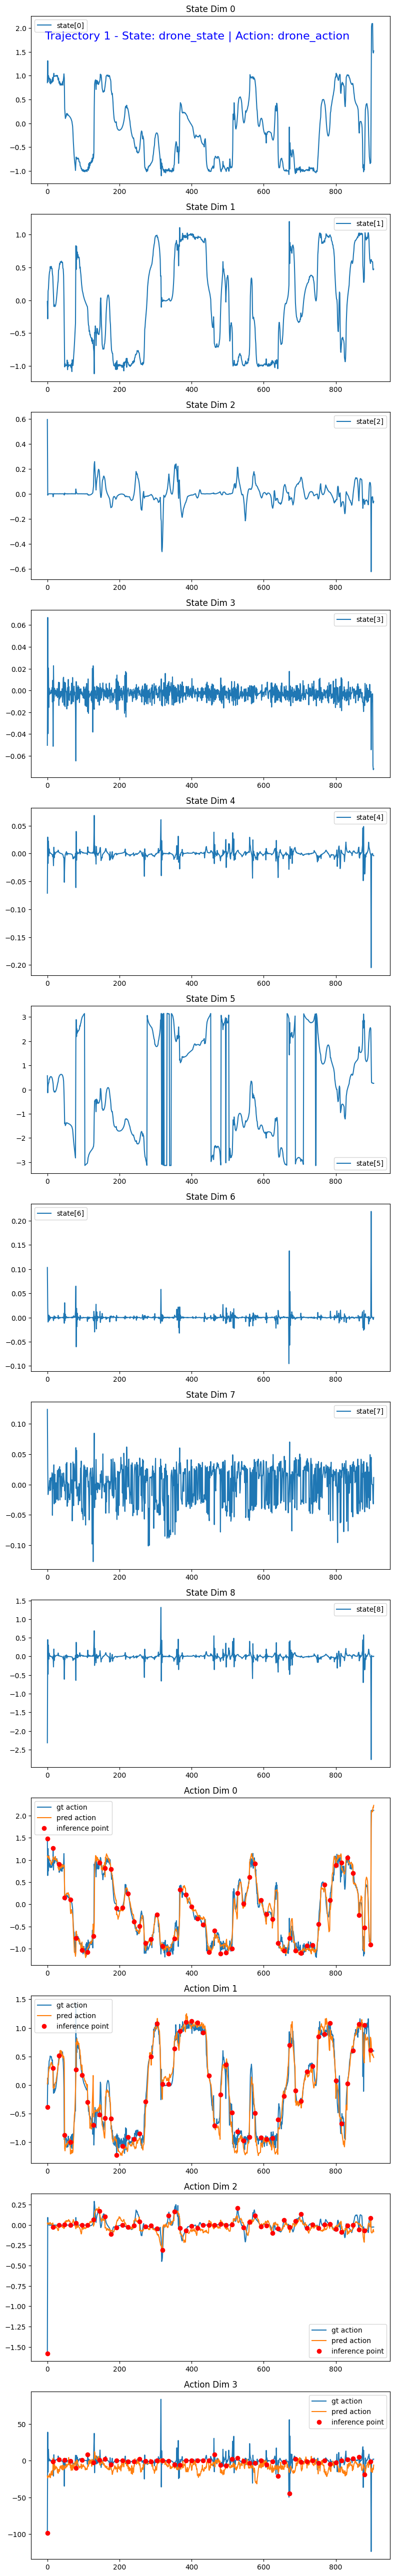

MSE loss for trajectory  1 : 39.35484426641373


In [4]:
mse1 = evaluate_traj(dataset, 1)

Running trajectory: 2
inferencing at step:  0
inferencing at step:  16
inferencing at step:  32
inferencing at step:  48
inferencing at step:  64
inferencing at step:  80
inferencing at step:  96
inferencing at step:  112
inferencing at step:  128
inferencing at step:  144
inferencing at step:  160
inferencing at step:  176
inferencing at step:  192
inferencing at step:  208
inferencing at step:  224
inferencing at step:  240
inferencing at step:  256
inferencing at step:  272
inferencing at step:  288
inferencing at step:  304
inferencing at step:  320
inferencing at step:  336
inferencing at step:  352
inferencing at step:  368
inferencing at step:  384
inferencing at step:  400
inferencing at step:  416
inferencing at step:  432
inferencing at step:  448
inferencing at step:  464
inferencing at step:  480
inferencing at step:  496
inferencing at step:  512
inferencing at step:  528
inferencing at step:  544
inferencing at step:  560
inferencing at step:  576
inferencing at step:  59

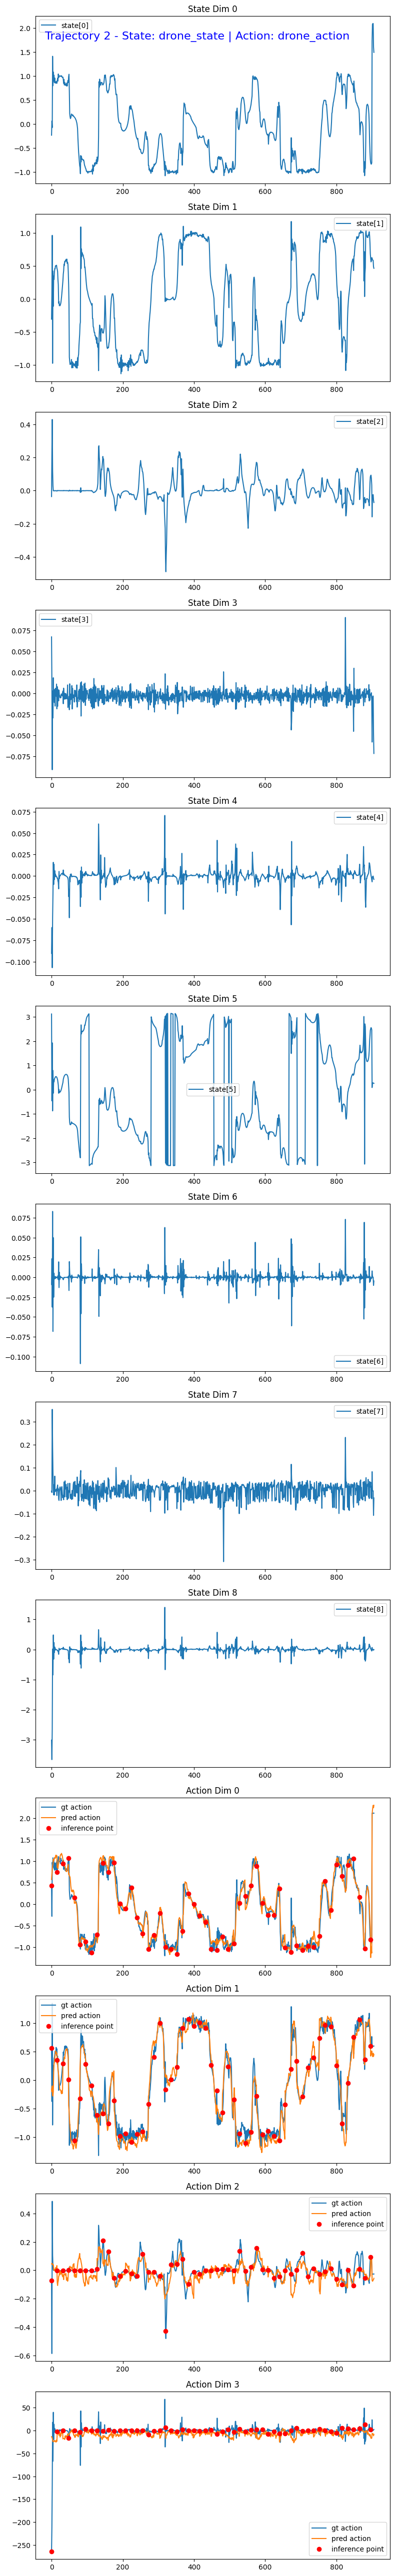

MSE loss for trajectory  2 : 63.97207200659191


In [5]:
mse2 = evaluate_traj(dataset, 2)

Running trajectory: 3
inferencing at step:  0
inferencing at step:  16
inferencing at step:  32
inferencing at step:  48
inferencing at step:  64
inferencing at step:  80
inferencing at step:  96
inferencing at step:  112
inferencing at step:  128
inferencing at step:  144
inferencing at step:  160
inferencing at step:  176
inferencing at step:  192
inferencing at step:  208
inferencing at step:  224
inferencing at step:  240
inferencing at step:  256
inferencing at step:  272
inferencing at step:  288
inferencing at step:  304
inferencing at step:  320
inferencing at step:  336
inferencing at step:  352
inferencing at step:  368
inferencing at step:  384
inferencing at step:  400
inferencing at step:  416
inferencing at step:  432
inferencing at step:  448
inferencing at step:  464
inferencing at step:  480
inferencing at step:  496
inferencing at step:  512
inferencing at step:  528
inferencing at step:  544
inferencing at step:  560
inferencing at step:  576
inferencing at step:  59

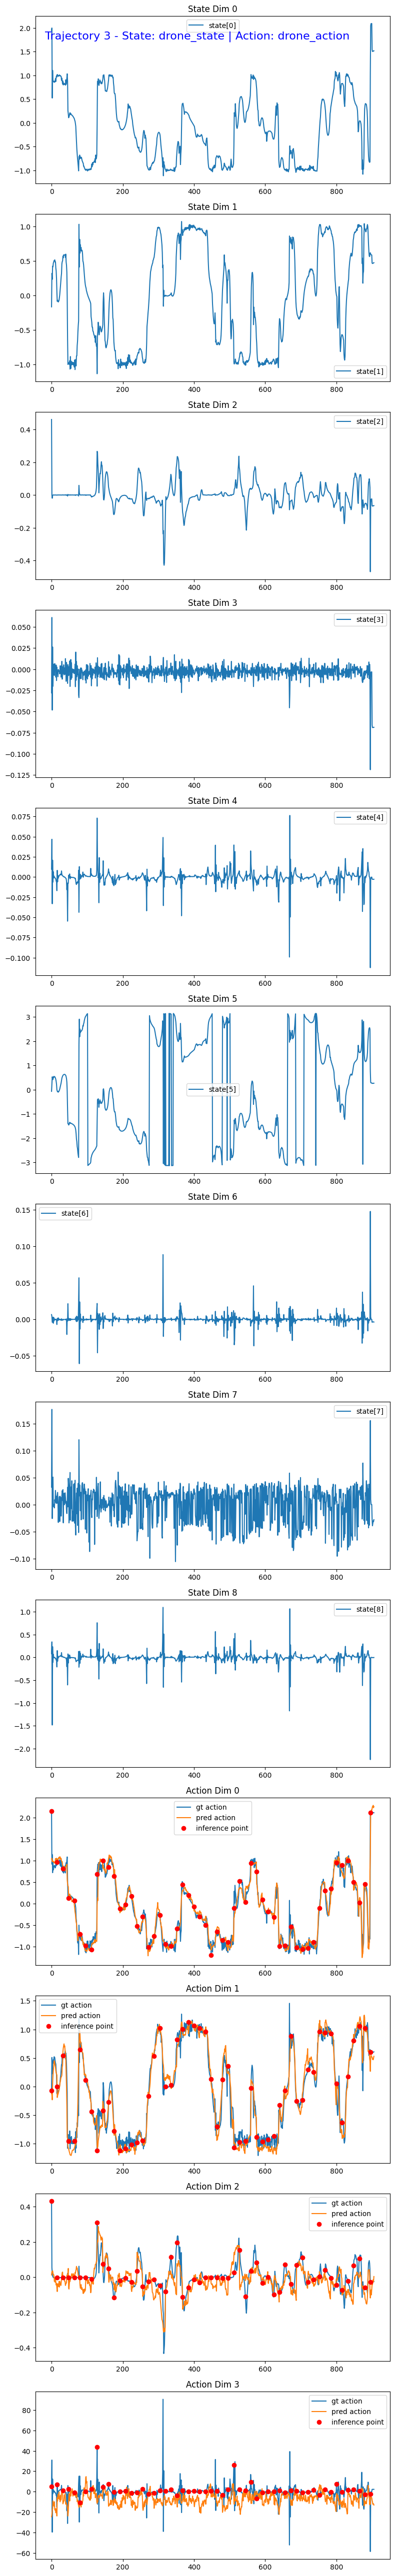

MSE loss for trajectory  3 : 31.871764742341828


In [6]:
mse3 = evaluate_traj(dataset, 3)

Running trajectory: 4
inferencing at step:  0
inferencing at step:  16
inferencing at step:  32
inferencing at step:  48
inferencing at step:  64
inferencing at step:  80
inferencing at step:  96
inferencing at step:  112
inferencing at step:  128
inferencing at step:  144
inferencing at step:  160
inferencing at step:  176
inferencing at step:  192
inferencing at step:  208
inferencing at step:  224
inferencing at step:  240
inferencing at step:  256
inferencing at step:  272
inferencing at step:  288
inferencing at step:  304
inferencing at step:  320
inferencing at step:  336
inferencing at step:  352
inferencing at step:  368
inferencing at step:  384
inferencing at step:  400
inferencing at step:  416
inferencing at step:  432
inferencing at step:  448
inferencing at step:  464
inferencing at step:  480
inferencing at step:  496
inferencing at step:  512
inferencing at step:  528
inferencing at step:  544
inferencing at step:  560
inferencing at step:  576
inferencing at step:  59

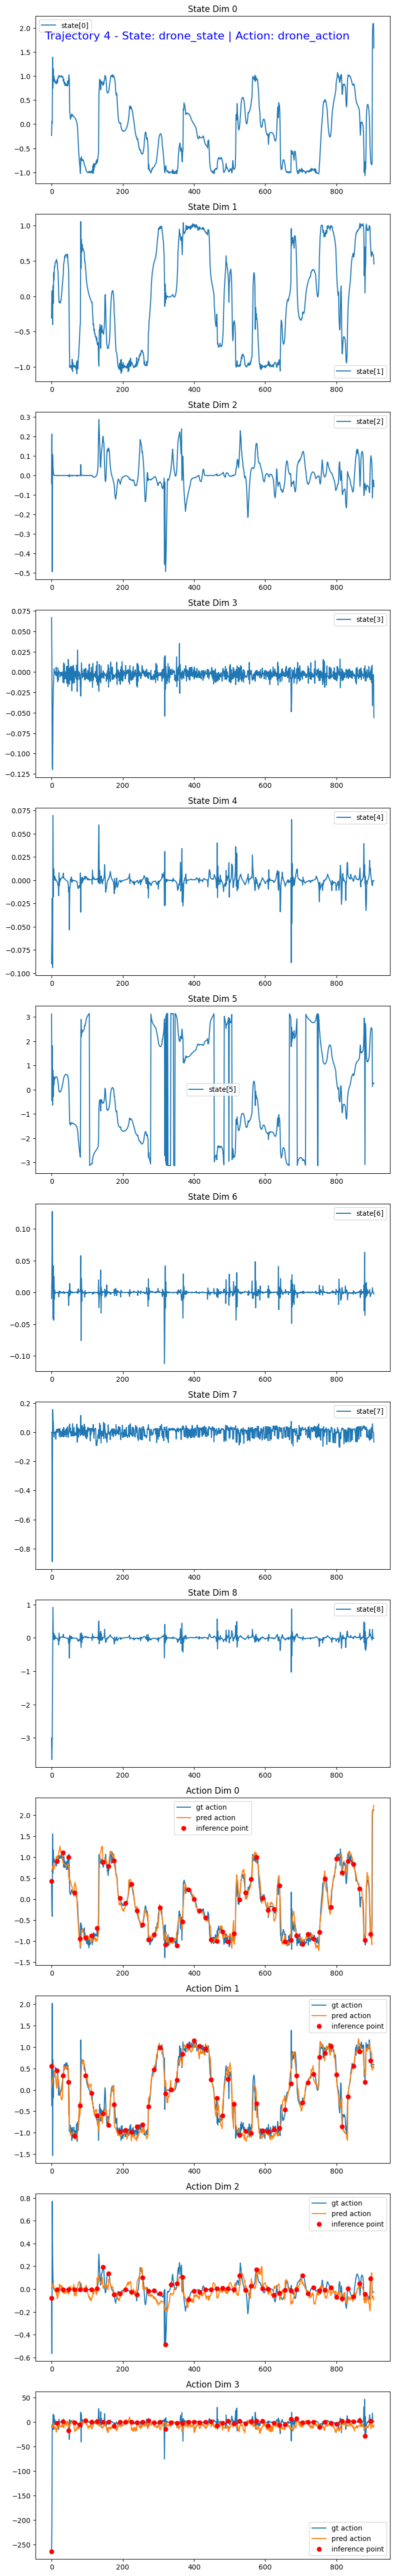

MSE loss for trajectory  4 : 57.59395342556757


In [7]:
mse4 = evaluate_traj(dataset, 4)

Running trajectory: 5
inferencing at step:  0
inferencing at step:  16
inferencing at step:  32
inferencing at step:  48
inferencing at step:  64
inferencing at step:  80
inferencing at step:  96
inferencing at step:  112
inferencing at step:  128
inferencing at step:  144
inferencing at step:  160
inferencing at step:  176
inferencing at step:  192
inferencing at step:  208
inferencing at step:  224
inferencing at step:  240
inferencing at step:  256
inferencing at step:  272
inferencing at step:  288
inferencing at step:  304
inferencing at step:  320
inferencing at step:  336
inferencing at step:  352
inferencing at step:  368
inferencing at step:  384
inferencing at step:  400
inferencing at step:  416
inferencing at step:  432
inferencing at step:  448
inferencing at step:  464
inferencing at step:  480
inferencing at step:  496
inferencing at step:  512
inferencing at step:  528
inferencing at step:  544
inferencing at step:  560
inferencing at step:  576
inferencing at step:  59

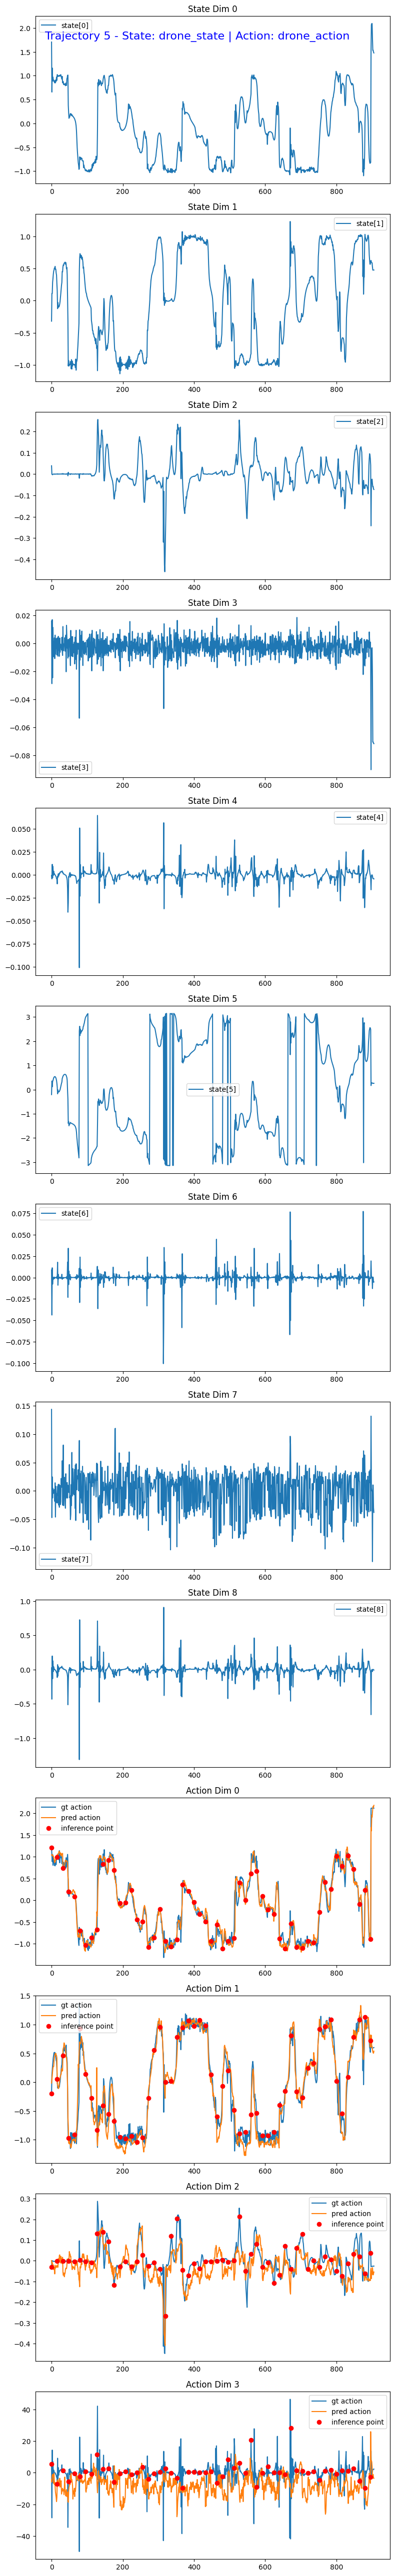

MSE loss for trajectory  5 : 32.012888184153034


In [8]:
mse5 = evaluate_traj(dataset, 5)

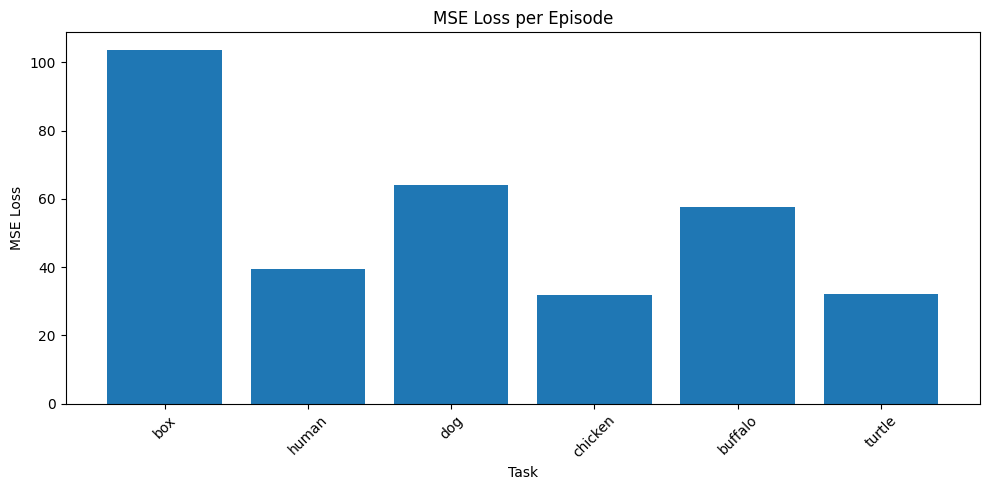

In [9]:
import matplotlib.pyplot as plt

MSE_losses = {0:mse0,
              1:mse1,
              2:mse2,
              3:mse3,
              4:mse4,
              5:mse5}
tasks = [
    "box",
    "human",
    "dog",
    "chicken",
    "buffalo",
    "turtle"
]

plt.figure(figsize=(10, 5))
plt.bar(range(len(MSE_losses)), MSE_losses.values(), tick_label=tasks)
plt.ylabel("MSE Loss")
plt.xlabel("Task")
plt.title("MSE Loss per Episode")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Online evaluation
We used the cluster to run the model because Mac M4 where the simulator is running doesnt support cuda and flash attention.
We have a program that connects to the simulator and pauses it every DT=0.1 sec and sends the current state data to the cluster which will infer an action to perform and the program will trigger that action and resuming the simulation.

In this script we initially make the drone follow the object programmatically the first X steps, then there is a take over by the model. We qualitatively see that it often diverges the object in few seconds.

Note tat once the model is taking over, the video looks saccadic, this is normal and due to the constant pausing/resuming the simulation.

See `video-online.mp4` and our report.